In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Activation

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

from skimage import io, transform, exposure

import pandas as pd
import numpy as np
import random
import os

In [3]:
# Load the number 4 model, the best
model = load_model("../models/Step01/sign_model__Conv_5x5_5x5_5x5_Dense_256_256_Filter_16_32_64_02_09_2021_14_29_06")

In [4]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 16)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
activation_33 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 16, 16, 32)       

In [67]:
df = pd.read_csv("../dataset/archive/Test.csv")[["ClassId", "Path"]]
names = pd.read_csv("../dataset/archive/signnames.csv")["SignName"]

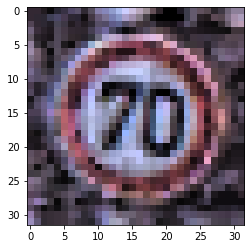

In [76]:
id = random.randint(0,df.shape[0])
id, path = df.iloc[id]

image = image = io.imread(f'../dataset/archive/{path}')
image = transform.resize(image, (32,32))
image = exposure.equalize_adapthist(image, clip_limit=0.1)
plt.imshow(image)

In [77]:
image = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
result = pred.argmax()
names[result]

'Speed limit (70km/h)'

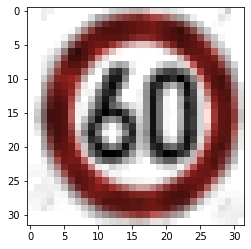

In [110]:
id = random.randint(0,df.shape[0])
id, path = df.iloc[id]

image = image = io.imread(f'../dataset/60.png')
image = transform.resize(image, (32,32))
image = exposure.equalize_adapthist(image, clip_limit=0.1)
plt.imshow(image)
image = image.astype("float32") / 255.0
# image = np.expand_dims(image, axis=0)
image = np.array([image])

In [111]:
pred = model.predict(image)
result = pred.argmax()
names[result]

'Speed limit (60km/h)'

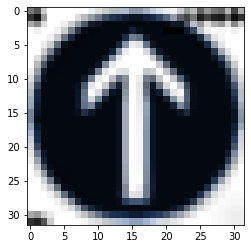

In [112]:
id = random.randint(0,df.shape[0])
id, path = df.iloc[id]

image = io.imread(f'../dataset/placa.png')
image = transform.resize(image, (32,32))
image = exposure.equalize_adapthist(image, clip_limit=0.1)
plt.imshow(image)
image = image.astype("float32") / 255.0
# image = np.expand_dims(image, axis=0)
image = np.array([image])

In [116]:
pred = model.predict(image)
result = pred.argmax()
print(f"{names[result]}, id {result}")

Ahead only, id 35


/Users/ivastival/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


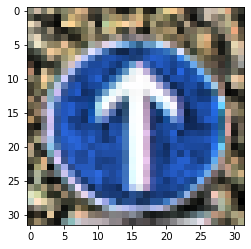

In [124]:
df_35 = df[df["ClassId"] == 35].reset_index(drop=True)
i = random.randint(0, df_35.shape[0])
img_35 = df_35["Path"][i]

image = io.imread(f'../dataset/archive/{img_35}')
image = transform.resize(image, (32,32))
image = exposure.equalize_adapthist(image, clip_limit=0.1)
plt.imshow(image)